<a href="https://colab.research.google.com/github/farahenany/Dissertation/blob/main/Factor_Analysis_for_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
% pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 199 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=2699b0299a05f122e70a60000627cdfc0f4885543b0129a34da4abbf39f24fe2
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
# set option to display all columns in data frame
pd.options.display.max_columns = None

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
customer_base = pd.read_csv("drive/MyDrive/Dissertation/Dissertation/customer_retail_bank/UK_final_data.csv")
customer_base.head()

,Numcust,TRB,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Revenue,Primary,International,CA,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS
0,0.070379,-0.243790,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,-0.251197,-0.245633,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0
1,0.177381,-0.199371,0.487501,0.381397,-0.270957,-0.235752,2.701543,-0.321304,-0.251197,-0.204336,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0
2,0.070379,-0.243790,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,-0.251197,-0.245633,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0
3,0.070379,-0.243790,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,0.298711,-0.245633,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0
4,0.070379,-0.243790,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,0.298711,-0.245633,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0


In [ ]:
customer_base=customer_base.drop(['CA','Card', 'Insurance','Investment', "Mortgage","Primary",'CA_holders', 'Digital'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
#Performing a factoribility test (Bartlett)

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(customer_base)
chi_square_value, p_value

(401323.50955611246, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. 




In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(customer_base)

In [ ]:
kmo_model

0.7834011314924636

Value of KMO less than 0.6 is considered inadequate.

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()

fa.fit(customer_base)
eigen_values, vectors = fa.get_eigenvalues()
# fa.analyze(customer_base, 22, rotation=None)
# # Check Eigenvalues
# ev, v = fa.get_eigenvalues()
# ev

In [ ]:
eigen_values

array([4.90297905, 1.426031  , 1.00001584, 1.00000351, 1.00000037,
       1.00000004, 0.95216376, 0.90705316, 0.65935912, 0.47409139,
       0.33836418, 0.18241296, 0.09136434, 0.06616128])

In [ ]:
vectors

array([ 4.54941083e+00,  1.05297634e+00,  6.84093725e-01,  2.01484579e-01,
        3.87223028e-02,  1.03116164e-04,  1.98632017e-06,  1.50953367e-06,
       -4.53408891e-06, -7.62828910e-03, -8.64929853e-02, -1.10304975e-01,
       -2.62415297e-01, -3.67334877e-01])

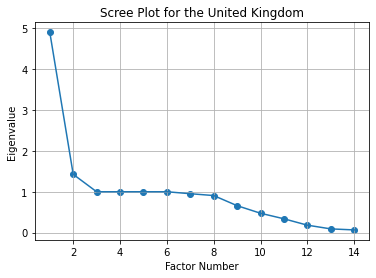

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,customer_base.shape[1]+1),eigen_values)
plt.plot(range(1,customer_base.shape[1]+1),eigen_values)
plt.title('Scree Plot for the United Kingdom')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(customer_base)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
factor_df=pd.DataFrame(fa.loadings_,index=customer_base.columns)
print(factor_df)

                      0         1         2
Numcust        0.907881  0.140185  0.379197
TRB            0.427081  0.638484  0.515748
Primary_cust   0.609569  0.426247  0.231561
Digital_cust   0.607462  0.107764  0.262370
Card_holders   0.869990  0.053980  0.138109
Ins_holders   -0.182978 -0.114010 -0.160331
Inv_holders    0.039412  0.075220  0.756950
Mort_holders   0.573086  0.103933  0.532024
Revenue        0.421446  0.865507  0.321830
International -0.000079 -0.000231 -0.000033
Proposition   -0.230035  0.484729  0.004558
Tenure         0.000437  0.000043 -0.000213
Age           -0.000144 -0.000189 -0.000674
NPS           -0.000280 -0.000689 -0.000734


In [ ]:
fa.get_factor_variance()

(array([3.09810917, 1.63705077, 1.53664446]),
 array([0.22129351, 0.1169322 , 0.10976032]),
 array([0.22129351, 0.33822571, 0.44798603]))